In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import timeit

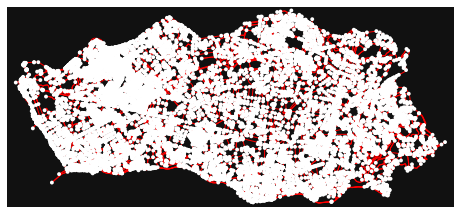

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
import osmnx as ox
G= ox.graph_from_place('Porto, Portugal')
ox.plot_graph(G, edge_color='red')

In [6]:
mapping=dict(zip(G, range(0, 20000)))
G = nx.relabel_nodes(G, mapping, copy="True")
nx.nodes(G)


NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [33]:
def all_shortest_paths(G, source, target, weight=None):

    if weight is not None:
        pred,dist = nx.dijkstra_predecessor_and_distance(G,source,weight=weight)
    else:
        pred = nx.predecessor(G,source)
    if target not in pred:
        raise nx.NetworkXNoPath()
    stack = [[target,0]]
    top = 0
    while top >= 0:
        node,i = stack[top]
        if node == source:
            yield [p for p,n in reversed(stack[:top+1])]
        if len(pred[node]) > i:
            top += 1
            if top == len(stack):
                stack.append([pred[node][i],0])
            else:
                stack[top] = [pred[node][i],0]
        else:
            stack[top-1][1] += 1
            top -= 1


In [60]:
sta = timeit.default_timer()
for i in all_shortest_paths(G, 1700, 17500):
    sto =timeit.default_timer()
    t = sto-sta
    print('Route:',i, '===>', 'Length:', len(i), '===>', 'Time:', t)

Route: [1700, 1697, 1693, 12104, 4376, 4062, 2467, 641, 546, 552, 545, 6602, 1353, 1041, 562, 561, 10703, 10705, 10704, 391, 382, 381, 5331, 5811, 2789, 2747, 84, 85, 92, 87, 88, 333, 330, 2297, 2298, 2295, 5192, 13891, 1504, 13893, 8062, 13814, 8061, 13808, 13822, 13806, 13859, 1503, 13513, 3253, 3256, 13854, 1512, 3254, 13544, 13872, 13874, 13881, 1513, 4120, 7101, 7102, 7105, 2406, 2405, 2431, 2439, 2440, 2404, 7098, 14586, 1507, 14693, 14550, 5507, 13683, 14562, 1515, 17472, 13708, 13710, 2267, 14559, 17580, 17437, 10046, 2275, 17500] ===> Length: 88 ===> Time: 0.028948266000043077
Route: [1700, 1697, 1693, 1701, 12103, 47, 2880, 438, 546, 552, 545, 6602, 1353, 1041, 562, 561, 10703, 10705, 10704, 391, 382, 381, 5331, 5811, 2789, 2747, 84, 85, 92, 87, 88, 333, 330, 2297, 2298, 2295, 5192, 13891, 1504, 13893, 8062, 13814, 8061, 13808, 13822, 13806, 13859, 1503, 13513, 3253, 3256, 13854, 1512, 3254, 13544, 13872, 13874, 13881, 1513, 4120, 7101, 7102, 7105, 2406, 2405, 2431, 2439, 244

In [63]:
time1 = [0.029600314999925104,
0.028318999000020995,
0.028381262000038987,
0.02819180800020149,
0.0906986660002076,
0.0280306310000924,
0.027960437000274396,
0.04794175699998959,
0.02816554399987581,
0.036523259000205144,
0.08949366400020153,
0.0300088539997887,
0.02854528099987874,
0.028743114999997488,
0.04966277199991964,
0.027744379000068875,
0.027632669000013266,
0.08743329400022049]

In [64]:
obs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

In [65]:
time2 = [0.19857326200144598,
0.010323566999431932,
0.0298065349998069,
0.0005196730016905349,
0.06689604000348481,
0.04395776800083695,
0.20209125900146319,
0.16286297699844,
0.15183238300232915,
0.22038997200070298,
0.22337879900078406,
0.0867547839989129,
0.1501611320018128,
0.1680933939969691,
0.21419519299888634,
0.236587788000179,
0.04938436600059504,
0.15284615500058862]

In [66]:
time3 = [0.052217950998965534,
0.04586207700049272,
0.04628308200153697,
0.049350540999512305,
0.04793993900057103,
0.048345601000619354,
0.045666600000913604,
0.04475905800063629,
0.04833537899867224,
0.04986108299999614,
0.04633308899974509,
0.043273184999634395,
0.23197554100079287,
0.050934382001287304,
0.046721247999812476,
0.04736987899923406,
0.05034669399901759,
0.04890071999943757]

<function matplotlib.pyplot.show(close=None, block=None)>

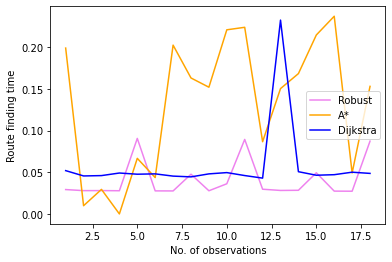

In [67]:
plt.plot(obs, time1, label='Robust', c='violet')
plt.plot(obs, time2, label='A*', c='orange')
plt.plot(obs, time3, label='Dijkstra', c = 'blue')

plt.xlabel("No. of observations")
plt.ylabel("Route finding time")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

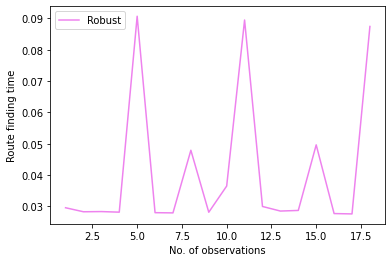

In [62]:
plt.plot(obs1, time1, label='Robust', c='violet')
plt.xlabel("No. of observations")
plt.ylabel("Route finding time")
plt.legend()
plt.show

In [58]:
x= sum(time)

In [59]:
x/18

0.041282039222273345

In [1]:
time_loss_1 = [109.49,
127.72,
111.65,
119.69,
91.73,
132.72,
197.02,
111.72,
112.70,
91.95]

In [5]:
sum(time_loss_1)/10

120.63900000000001

In [6]:
time_loss_2 = [140.81,
113.79,
157.75,
155.81,
137.63,
178.70,
74.93,
110.77,
121.82,
110.64]

In [7]:
sum(time_loss_2)/10

130.26500000000001

In [8]:
time_loss_3 = [159.26,
97.11,
179.39,
183.58,
151.39,
177.07,
96.10,
184.32,
101.27,
111.34]

In [9]:
sum(time_loss_3)/10

144.08299999999997

In [10]:
obs = [1,2,3,4,5,6,7,8,9,10]

<function matplotlib.pyplot.show(close=None, block=None)>

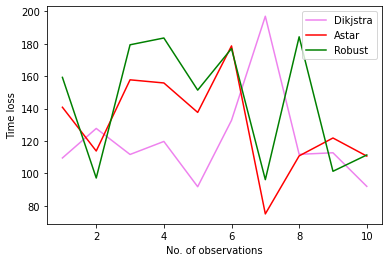

In [14]:
plt.plot(obs, time_loss_1, label='Dikjstra', c='violet')
plt.plot(obs, time_loss_2, label='Astar', c='red')
plt.plot(obs, time_loss_3, label='Robust', c='green')

plt.xlabel("No. of observations")
plt.ylabel("Time loss")
plt.legend()
plt.show

In [15]:
waiting_time_1 = [29,
28,
23,
30.00,
26.00,
26.00,
23.00,
29.00,
10.00,
29.00]

In [16]:
sum(waiting_time_1)/10

25.3

In [17]:
waiting_time_2 = [28.00,
33.00,
23.00,
29.00,
14.00,
24.00,
38.00,
19.00,
20.00,
33.00]

In [18]:
sum(waiting_time_2)/10

26.1

In [19]:
waiting_time_3 = [26.00,
8.00,
7.00,
31.00,
26.00,
8.00,
7.00,
22.00,
20.00,
3.00]

In [20]:
sum(waiting_time_3)/10

15.8

<function matplotlib.pyplot.show(close=None, block=None)>

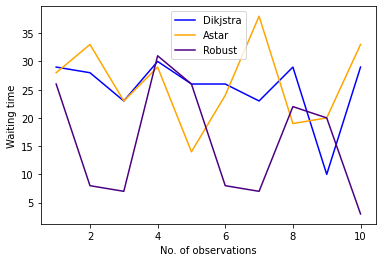

In [23]:
plt.plot(obs,waiting_time_1 , label='Dikjstra', c='blue')
plt.plot(obs, waiting_time_2, label='Astar', c='orange')
plt.plot(obs, waiting_time_3, label='Robust', c='indigo')

plt.xlabel("No. of observations")
plt.ylabel("Waiting time")
plt.legend()
plt.show